In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df_test = pd.read_csv("processed_data/test_matches.csv", low_memory=False)
df_odi = pd.read_csv("processed_data/odi_matches.csv", low_memory=False)
df_t20 = pd.read_csv("processed_data/t20_matches.csv", low_memory=False)
df_ipl = pd.read_csv("processed_data/ipl_matches.csv", low_memory=False)

df_combined = pd.concat([df_test, df_odi, df_t20, df_ipl], ignore_index=True)

sns.set_style("whitegrid")  
plt.rcParams["figure.figsize"] = (10,6)

### Test Matches
#### (1)Top 5 Run Scorers

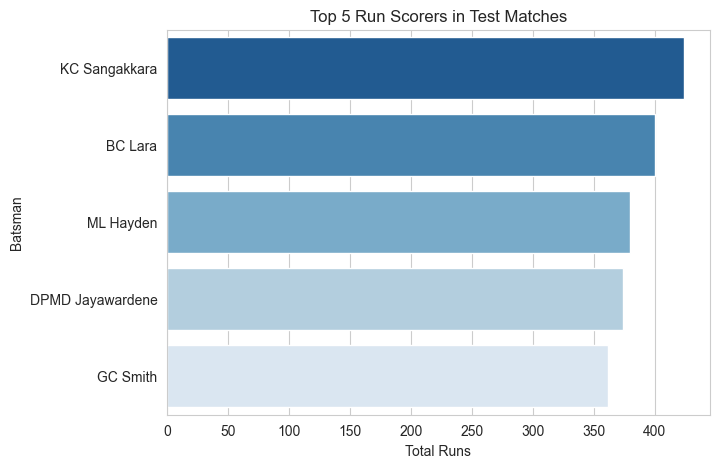

In [2]:
top_test_batsmen = df_test.groupby(["match_id", "batsman"])["runs_batsman"].sum().nlargest(5).reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=top_test_batsmen, y="batsman", x="runs_batsman", hue="batsman", dodge=False, palette="Blues_r", legend=False)
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 5 Run Scorers in Test Matches")

plt.show()

####  (2)Win Margin Distribution

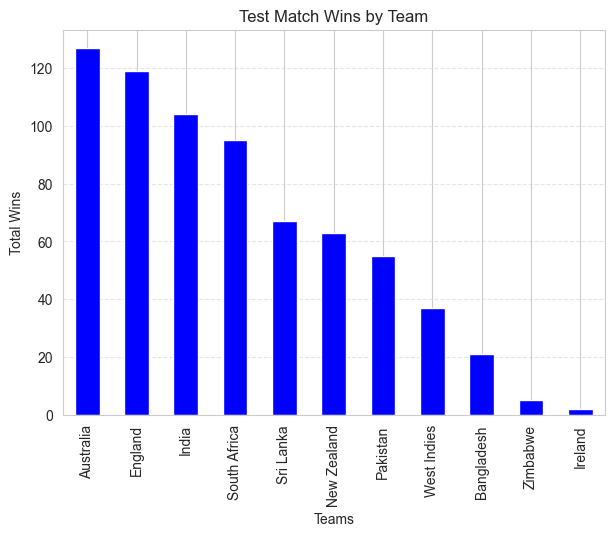

In [3]:
df_test = df_test.dropna(subset=["match_winner"])  
unique_matches = df_test.drop_duplicates(subset=["match_id"])
team_wins_test = unique_matches["match_winner"].value_counts()

plt.figure(figsize=(7, 5))
team_wins_test.plot(kind="bar", color="blue")

plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Test Match Wins by Team")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


### ODI Matches 
#### (3) Most Wins by Team

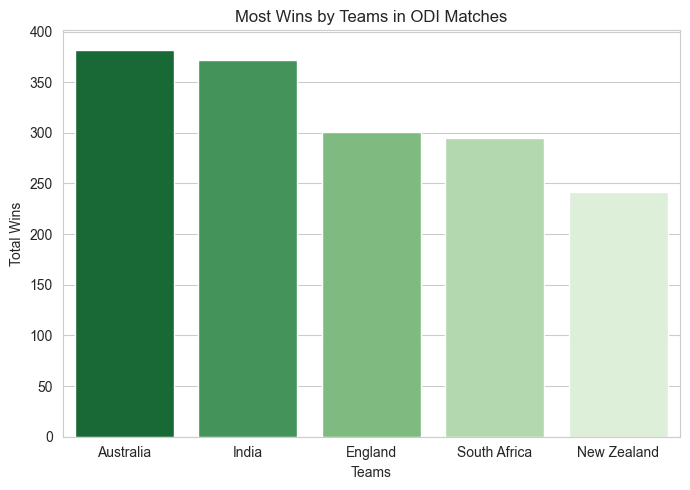

In [4]:
unique_odi_matches = df_odi.drop_duplicates(subset=["match_id"])  
team_wins_odi = unique_odi_matches["match_winner"].value_counts().head(5)
plt.figure(figsize=(7, 5))
sns.barplot(x=team_wins_odi.index, y=team_wins_odi.values, palette="Greens_r", hue=team_wins_odi.index, legend=False)

plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Most Wins by Teams in ODI Matches")

plt.tight_layout()
plt.show()

#### (4) Runs Per Over Distribution

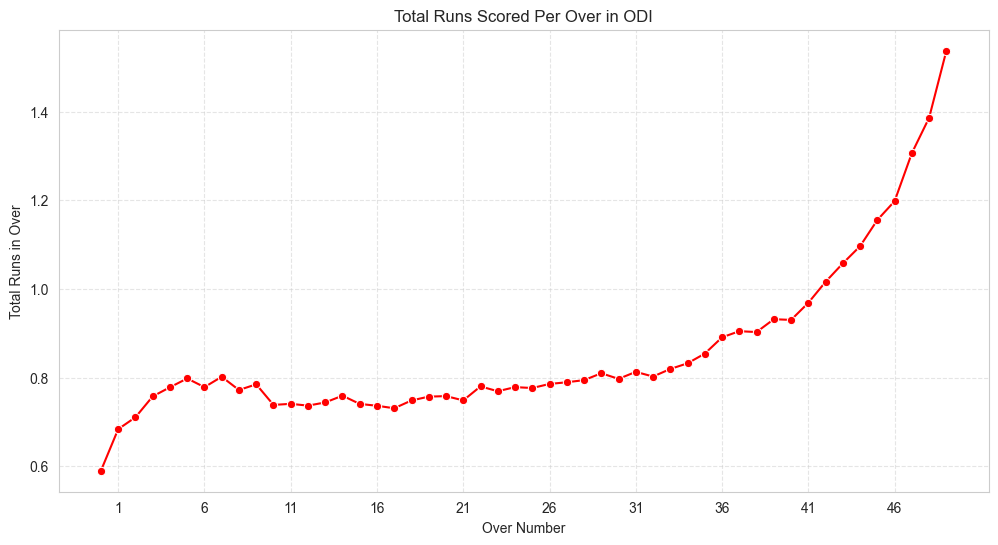

In [5]:
over_avg_odi = df_odi.groupby("over_number")["runs_total"].mean().reset_index()  # Use MEAN instead of SUM

plt.figure(figsize=(12, 6))
sns.lineplot(data=over_avg_odi, x="over_number", y="runs_total", marker="o", color="red")

plt.xlabel("Over Number")
plt.ylabel("Total Runs in Over")  # Change label to "Total Runs"
plt.title("Total Runs Scored Per Over in ODI")

plt.xticks(range(1, 51, 5))  # Show every 5 overs for readability
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### T20 Matches
#### (5) Most Six-Hitters in t20 matches

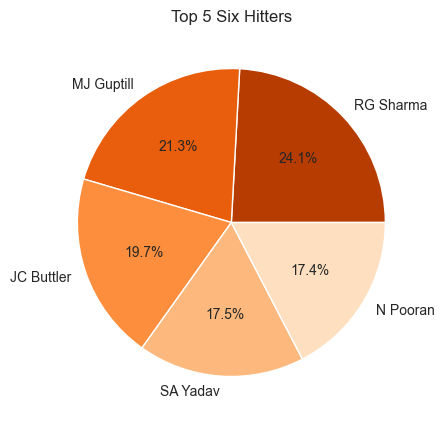

In [6]:
top_six_hitters = df_t20[df_t20["runs_batsman"] == 6]["batsman"].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
plt.pie(top_six_hitters.values, labels=top_six_hitters.index, autopct='%1.1f%%', colors=sns.color_palette("Oranges_r", len(top_six_hitters)))
plt.title("Top 5 Six Hitters")
plt.show()


#### (6) Wickets Taken by Bowlers

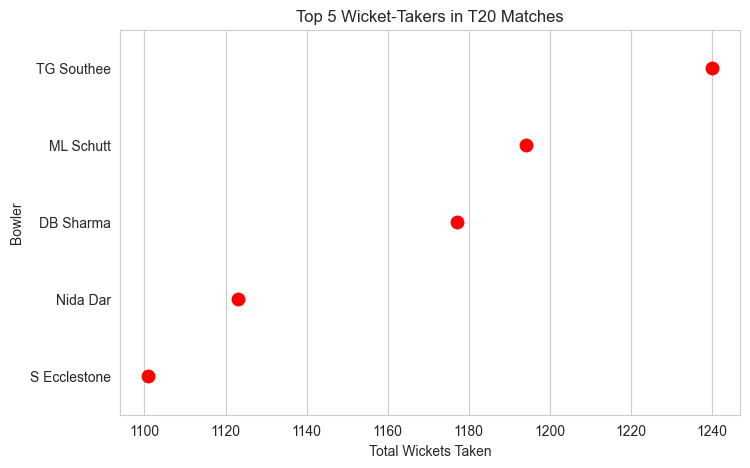

In [7]:
top_t20_bowlers = df_t20[df_t20["runs_batsman"] == 0]["bowler"].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
sns.stripplot(x=top_t20_bowlers.values, y=top_t20_bowlers.index, color="red", size=10)
plt.xlabel("Total Wickets Taken")
plt.ylabel("Bowler")
plt.title("Top 5 Wicket-Takers in T20 Matches")
plt.show()



###  IPL Matches
#### (7) Toss Decision vs Match Wins 

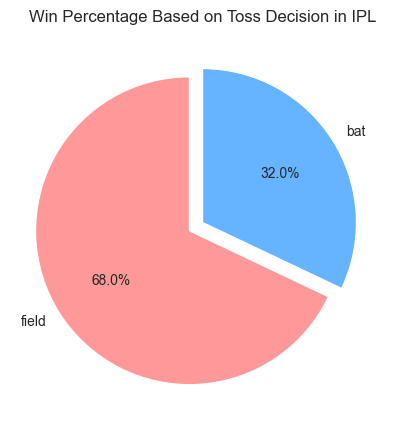

In [8]:
toss_win_counts = df_ipl[df_ipl["toss_winner"] == df_ipl["match_winner"]]["toss_decision"].value_counts()

plt.figure(figsize=(8,5))
plt.pie(toss_win_counts, labels=toss_win_counts.index, autopct="%1.1f%%", 
        colors=["#ff9999","#66b3ff"], startangle=90, explode=(0.1, 0))
plt.title("Win Percentage Based on Toss Decision in IPL")
plt.show()


#### (8)Most Successful IPL Teams: Wins vs Losses

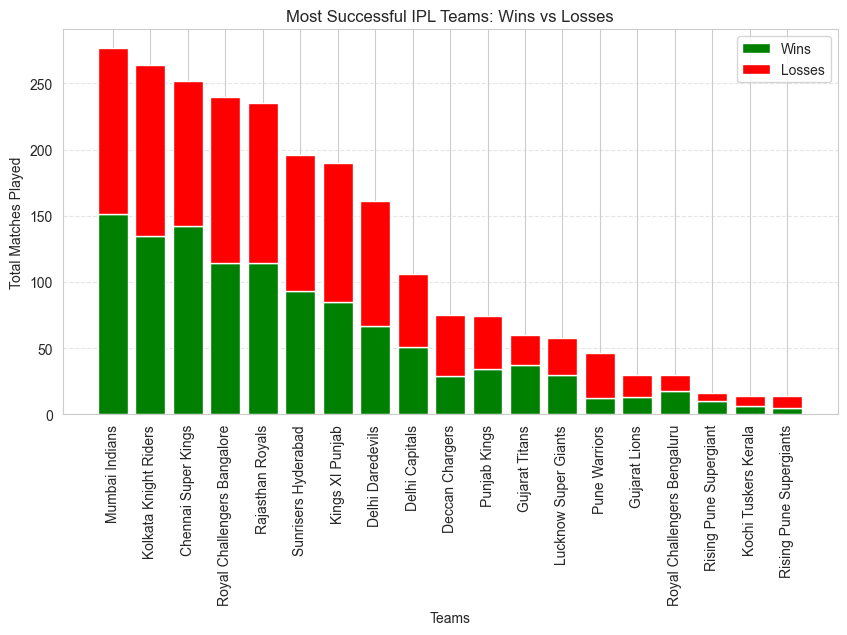

In [9]:
unique_matches = df_ipl.groupby("match_id").first()  # Get one row per match
team_matches = unique_matches["team_1"].value_counts() + unique_matches["team_2"].value_counts()
team_wins = unique_matches["match_winner"].value_counts()
team_losses = team_matches - team_wins
sorted_teams = team_matches.sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
plt.bar(sorted_teams, team_wins[sorted_teams], label="Wins", color="green")
plt.bar(sorted_teams, team_losses[sorted_teams], bottom=team_wins[sorted_teams], label="Losses", color="red")

plt.xlabel("Teams")
plt.ylabel("Total Matches Played")
plt.title("Most Successful IPL Teams: Wins vs Losses")
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### Combined Matches
#### (9)Top 5 Cities That Hosted Most Matches (Across All Formats)

In [10]:
df_test["format"] = "Test"
df_odi["format"] = "ODI"
df_t20["format"] = "T20"
df_ipl["format"] = "IPL"

df_combined = pd.concat([df_test, df_odi, df_t20, df_ipl], ignore_index=True)


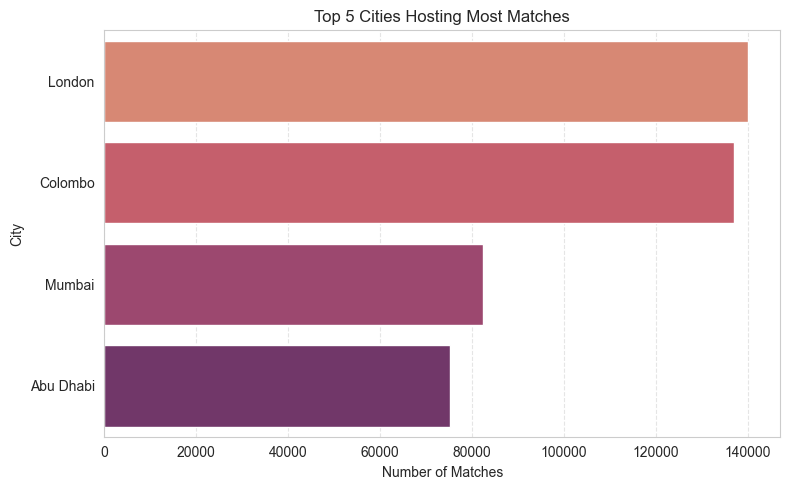

In [11]:
top_cities = df_combined["city"].value_counts().nlargest(5)

# Remove 'Unknown'
top_cities_filtered = top_cities.drop(labels=["Unknown"], errors="ignore").head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities_filtered.values, y=top_cities_filtered.index, hue=top_cities_filtered.index, palette="flare", legend=False)
plt.title("Top 5 Cities Hosting Most Matches")
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



#### (10)Total Runs per Inning Distributed Across Different Match Formats

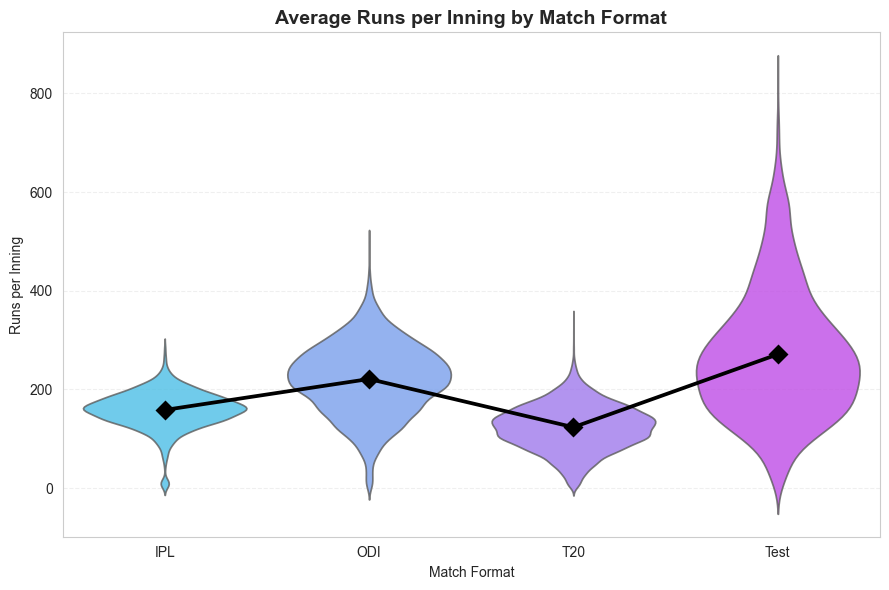

In [12]:
#runs per inning with format
runs_per_inning_format = (
    df_combined.groupby(["format", "match_id", "inning"])["runs_total"]
    .sum()
    .reset_index()
)

runs_per_inning_format = runs_per_inning_format.dropna()

plt.figure(figsize=(9, 6))

sns.violinplot(
    x="format",
    y="runs_total",
    data=runs_per_inning_format,
    hue="format",
    palette="cool",
    inner=None,
    legend=False,
    alpha=0.8
)

# Add mean values as points (replacing scale with markersize)
mean_values = runs_per_inning_format.groupby("format")["runs_total"].mean()
sns.pointplot(
    x=mean_values.index,
    y=mean_values.values,
    color="black",
    markers="D",
    markersize=8, 
    linestyles="-" 
)

plt.title("Average Runs per Inning by Match Format", fontsize=14, weight="bold")
plt.xlabel("Match Format")
plt.ylabel("Runs per Inning")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
